In [1]:
#task1=#the system focusses on air pressure system which generates pressurized air that are utilized in various functions of truck such as breaking and gear changes, the dataset pos class 
#corresponds to component failure for specific components  to APS system the negative class refers to truck with failure components not related to APS system

In [124]:
#task2=use mall customers dataset for knn clustering and agglomerative clustering

In [2]:
a=1+1
a

2

In [3]:
#the problem is to reduce the unnecessary cost due to unnecessary repairs, so its required to minimize the false predictions

In [4]:
#predicted class/True class/pos/neg 
#The total cost of prediction model the sum of cost_1 multiplied by number of instances with type 1 failure 
#and cost2 with number of instances witb type 2 failure
#cost1=10, cost2=500

In [5]:
Total_cost=cost1*no_instances+cost2*no_instances

from the above statement we can observe tht we have to reduce the false postives
and false negatives, more importantly we need to reduce false negatives

SyntaxError: invalid syntax (3642680009.py, line 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
import missingno as msno
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [2]:
!pip install matplotlib

In [3]:
train=pd.read_csv(r"C:\\Users\\prash\\Downloads\\aps+failure+at+scania+trucks (1)\\aps_failure_training_set.csv",on_bad_lines='skip')

In [4]:
test=pd.read_csv("C:\\Users\\prash\\Downloads\\aps+failure+at+scania+trucks (1)\\aps_failure_test_set.csv",on_bad_lines='skip')

In [5]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [6]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [7]:
print('shape of train dataset:',train.shape)
print('shape of test dataset :',test.shape)

shape of train dataset: (60000, 171)
shape of test dataset : (16000, 171)


In [8]:
train.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [9]:
train['class'].unique()

array(['neg', 'pos'], dtype=object)

In [10]:
test['class'].unique()

array(['neg', 'pos'], dtype=object)

In [11]:
train_class_ditribution=train['class'].value_counts()
train_class_ditribution

neg    59000
pos     1000
Name: class, dtype: int64

In [12]:
test_class_distribution=test['class'].value_counts()
test_class_distribution

neg    15625
pos      375
Name: class, dtype: int64

In [13]:
#we can see the  neg values are almost 60 times greater then pos values

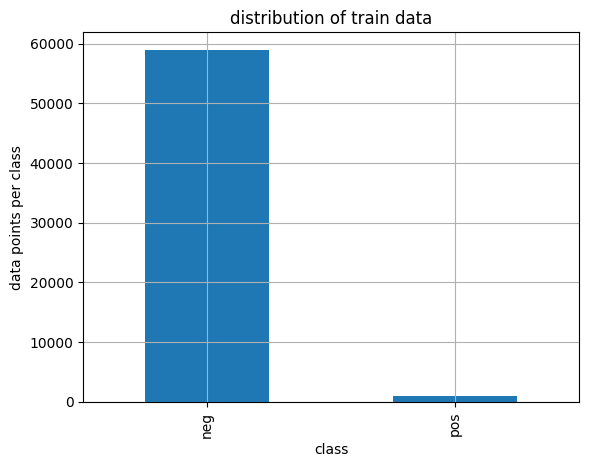

In [14]:
train_class_ditribution.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('data points per class')
plt.title('distribution of train data')
plt.grid()
plt.show()

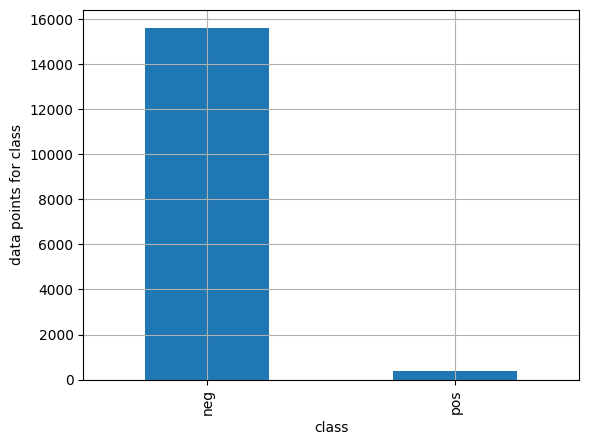

In [15]:
test_class_ditribution=test['class'].value_counts()
test_class_distribution.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('data points for class')
plt.grid()
plt.show()

In [16]:
#the given data is highly imbalanced
train.replace(to_replace='neg',value=0,inplace=True)
train.replace(to_replace='pos',value=1,inplace=True)

test.replace(to_replace='pos',value=1,inplace=True)
test.replace(to_replace='neg',value=0,inplace=True)

In [17]:
y_train=train['class']
train.drop(['class'],axis=1,inplace=True)
y_test=test['class']
test.drop(['class'],axis=1,inplace=True)

In [18]:
#check for missing values
train.replace(to_replace='na',value=np.NaN,inplace=True)
test.replace(to_replace='na',value=np.NaN,inplace=True)

In [19]:
train.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


<Axes: >

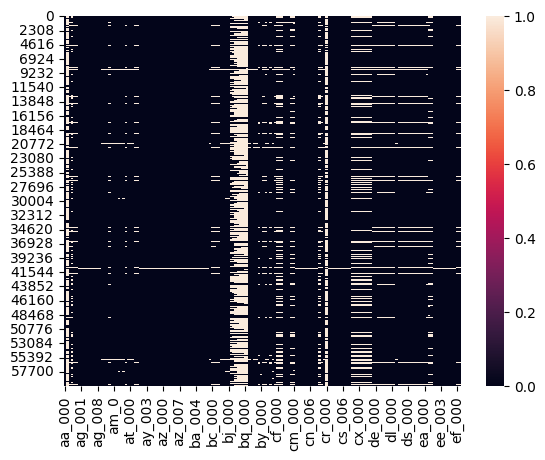

In [20]:
sns.heatmap(train.isnull())

In [21]:
#there are  lost of missing values in data..hence dropping them will cause loss of information
#75 percent of 60000=45000

In [22]:
train.dropna(axis=1,thresh=45000,inplace=True)
new_columns=train.columns

In [23]:
#find removed columns
removed_columns=[]
for i in test.columns:
    if i not in new_columns:
        removed_columns.append(i)
        #https://github.com/sandeepburra/APS/blob/master/APS%20Component%20failure%20prediction.ipynb

In [24]:
removed_columns

['ab_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'cr_000']

In [25]:
#dropping removed columns of train data fom test data
test.drop(removed_columns,axis=1,inplace=True)

In [26]:
train.shape,test.shape

((60000, 160), (16000, 160))

In [27]:
#imputation techniques mean
mean_imputaion=SimpleImputer(missing_values=np.nan,strategy='mean')
x_train_mean=mean_imputaion.fit_transform(train)
x_test_mean=mean_imputaion.fit_transform(test)

In [28]:
#imputation techniques median

median_imputation = SimpleImputer(missing_values= np.nan , strategy="median")
x_train_median = median_imputation.fit_transform(train)
x_test_median = median_imputation.transform(test)

In [29]:
#constant value imputation
constant_imputation=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-1)
x_train_constant=constant_imputation.fit_transform(train)
x_test_constant=constant_imputation.fit_transform(test)


In [30]:
#balancing data using smote (synthetic minority oversampling technique)
SMOTE is an oversampling method. It works by creating synthetic samples 
from the minor class instead of creating copies. The algorithm selects two 
or more similar instances (using a distance measure) and perturbing an
instance one attribute at a time by a random amount within the difference
to the neighboring instances.


SyntaxError: invalid syntax (1922579257.py, line 2)

In [31]:
sm=SMOTE(random_state=2)
x_train_mean_sm,y_train_mean=sm.fit_resample(x_train_mean,y_train.ravel())

In [32]:
from sklearn.preprocessing import StandardScaler
#standardizing data

In [33]:
ss=StandardScaler()
x_train_mean_std=ss.fit_transform(x_train_mean_sm)
x_test_mean_std=ss.fit_transform(x_test_mean)

In [34]:
#smote for median imputed data
sm=SMOTE(random_state=2)
X_train_median_sm, y_train_median = sm.fit_resample(x_train_median, y_train.ravel())



In [35]:
ss=StandardScaler()
X_train_median_std=ss.fit_transform(X_train_median_sm)
x_test_median_std=ss.fit_transform(x_test_median)

In [36]:
#SMOTE for constant value Imputed data

sm = SMOTE(random_state=2)
X_train_con_sm, y_train_constant = sm.fit_resample(x_train_constant, y_train.ravel())



In [37]:
ss = StandardScaler()
X_train_constant_std = ss.fit_transform(X_train_con_sm)
X_test_constant_std = ss.transform(x_test_constant)

In [38]:
#Utility Functions

def plot_confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)
    plt.figure(figsize=(8,4))
    labels = ["neg","pos"]
    cmap=sns.light_palette('blue')
    sns.heatmap(C,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('predicted class')
    plt.ylabel('original class')
    plt.title('confusion matrix')
    plt.show()
    
    
    plt.show()
    cost_1 = 10*C[0][1]
    cost_2 = 500*C[1][0]
    total_cost = cost_1 + cost_2
    print("f1_score :",f1_score(test_y, predict_y))
    print("Total Cost due to mis classifiation:",total_cost)

In [39]:
def total_cost(test_y, predict_y):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    C = confusion_matrix(test_y, predict_y)
    cost_1 = 10*C[0][1]
    cost_2 = 500*C[1][0]
    total = (cost_1 + cost_2)
    return total

In [40]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.figure(figsize=(8,8))
    plt.title('precision and recall scores as a function of decision threshold')
    plt.plot(thresholds,recalls[:-1],"b--",label='precision')
    plt.ylabel('score')
    plt.xlabel('decision threshold')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    

In [41]:
def pred_with_threshold(sig_clf_probs,t):
    '''
    This function takes proability scores and threshold value and classifies predictions based on threshold value
    
    '''
    

    predictions = []
    for i in sig_clf_probs:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [42]:
#Random Model


In [43]:
import random


f1_score on Test Data using Random Model 0.04674772754102231


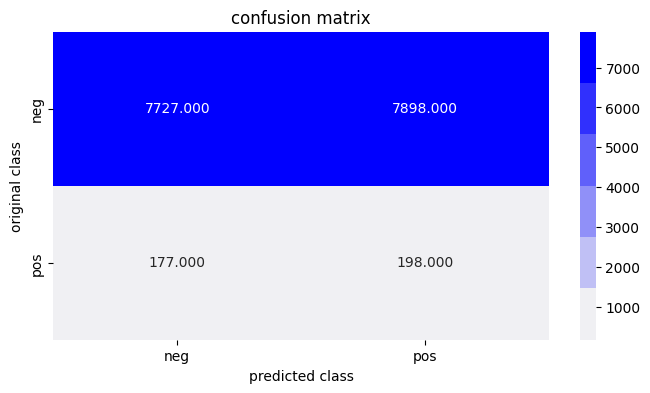

f1_score : 0.04674772754102231
Total Cost due to mis classifiation: 167480


In [44]:
test_len = x_test_mean_std.shape[0]
predicted_y = np.zeros((test_len))
for i in range(test_len):
    predicted_y[i] =random.randint(0,1)
print("f1_score on Test Data using Random Model",f1_score(y_test, predicted_y))

plot_confusion_matrix(y_test, predicted_y)

In [45]:
#with simple Random model we got f1_score as 0.047 and cost as 1,71,090. This would be the benchmark for our models

In [46]:
parameters={'C':[10 ** x for x in range(-6,3)]}
parameters

{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [47]:
x_train_mean_std=x_train_mean_std[:20000]
y_train_mean=y_train_mean[:20000]


In [48]:
#Gridsearch CV with 8 fold crossvalidation
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc=SVC()
GCV=GridSearchCV(svc,param_grid=parameters,scoring='f1',verbose=1,cv=8,n_jobs=-1)
GCV.fit(x_train_mean_std,y_train_mean)


Fitting 8 folds for each of 9 candidates, totalling 72 fits


GridSearchCV(cv=8, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100]},
             scoring='f1', verbose=1)

In [49]:
clf= GCV.best_estimator_


In [50]:
GCV.best_estimator_

SVC(C=10)

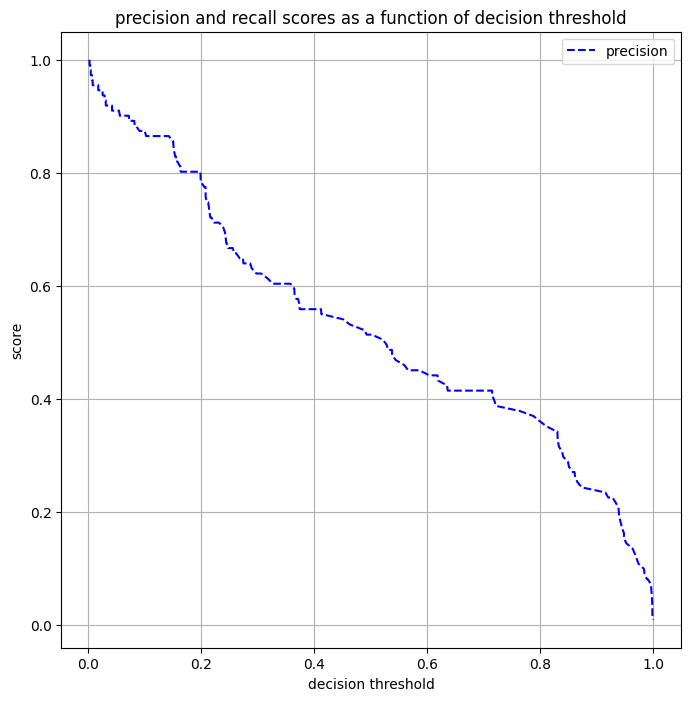

In [51]:
x_t, x_c, y_t, y_c = train_test_split(x_train_mean_std , y_train_mean, stratify=y_train_mean, test_size=0.3)
clf.fit(x_t, y_t)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_t, y_t)
sig_clf_probs = sig_clf.predict_proba(x_c)[:,1]
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [52]:
t=0.25
clf= GCV.best_estimator_
clf.fit(x_train_mean_std , y_train_mean)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_mean_std , y_train_mean)
test_clf_probs = sig_clf.predict_proba(x_test_mean_std)[:,1]
train_clf_probs = sig_clf.predict_proba(x_train_mean_std)[:,1]

In [53]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


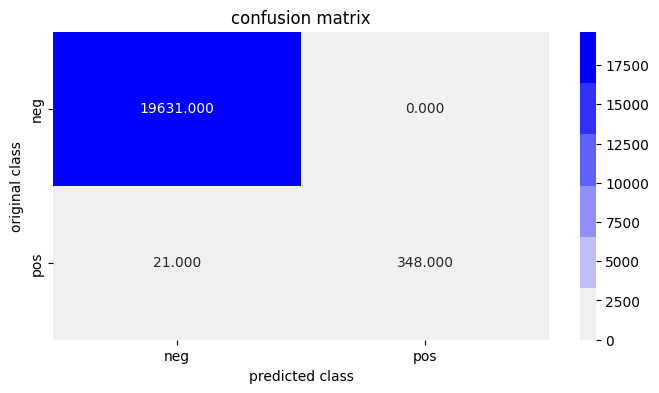

f1_score : 0.9707112970711297
Total Cost due to mis classifiation: 10500
Test Confusion Matrix


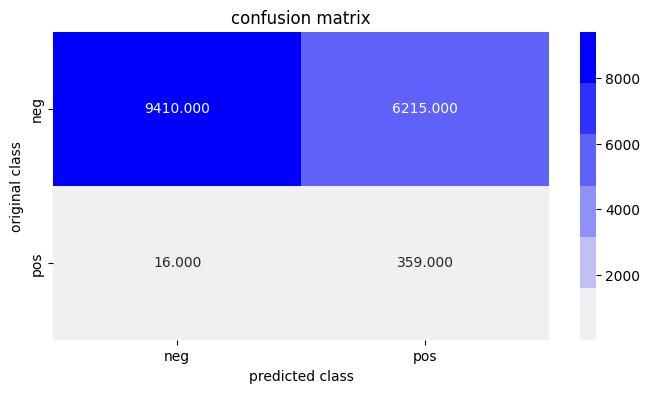

f1_score : 0.10332421931213125
Total Cost due to mis classifiation: 70150


In [54]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_mean, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [55]:
#4.3. Linear\logistic Regression with mean
parameters = {"alpha": [10 ** x for x in range(-6, 3)], "penalty" : ['l2','l1'], "loss" : ['log','hinge']}
#Gridsearch CV with 8 fold crossvalidation
LR = SGDClassifier()    
GCV = GridSearchCV(LR,param_grid=parameters, scoring = "f1", verbose = 1,cv=8, n_jobs = -1)
GCV.fit(x_train_mean_std , y_train_mean )


Fitting 8 folds for each of 36 candidates, totalling 288 fits


GridSearchCV(cv=8, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100],
                         'loss': ['log', 'hinge'], 'penalty': ['l2', 'l1']},
             scoring='f1', verbose=1)

In [56]:
clf= GCV.best_estimator_


In [57]:
GCV.best_estimator_


SGDClassifier()

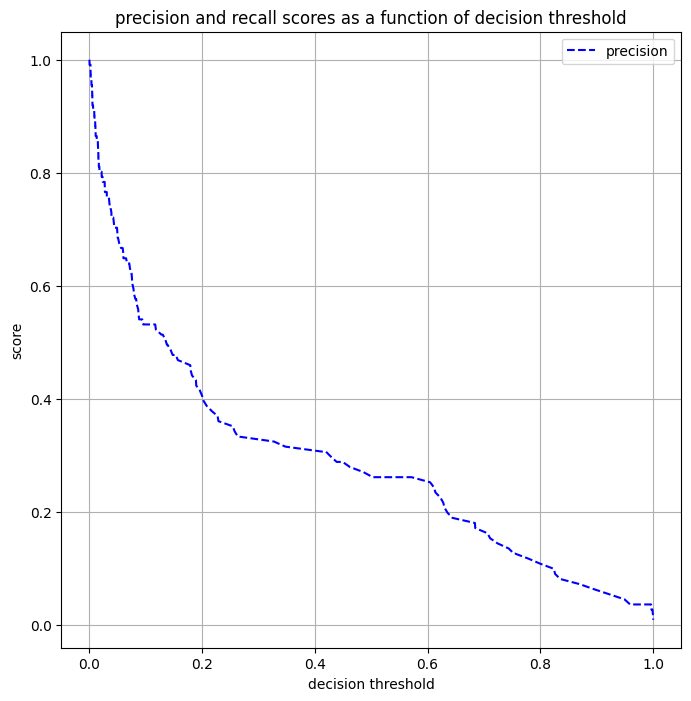

In [58]:
x_t, x_c, y_t, y_c = train_test_split(x_train_mean_std , y_train_mean, stratify=y_train_mean, test_size=0.3)
clf.fit(x_t, y_t)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_t, y_t)
sig_clf_probs = sig_clf.predict_proba(x_c)[:,1]
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [59]:
t=0.25


In [60]:
clf= GCV.best_estimator_
clf.fit(x_train_mean_std , y_train_mean)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_mean_std , y_train_mean)
test_clf_probs = sig_clf.predict_proba(x_test_mean_std)[:,1]
train_clf_probs = sig_clf.predict_proba(x_train_mean_std)[:,1]

In [61]:
clf= GCV.best_estimator_
clf.fit(x_train_mean_std , y_train_mean)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_mean_std , y_train_mean)
test_clf_probs = sig_clf.predict_proba(x_test_mean_std)[:,1]
train_clf_probs = sig_clf.predict_proba(x_train_mean_std)[:,1]


In [62]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)


Train Confusion Matrix


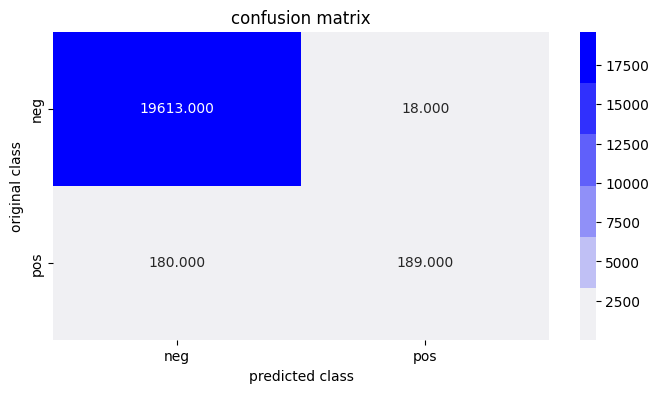

f1_score : 0.6562499999999999
Total Cost due to mis classifiation: 90180
Test Confusion Matrix


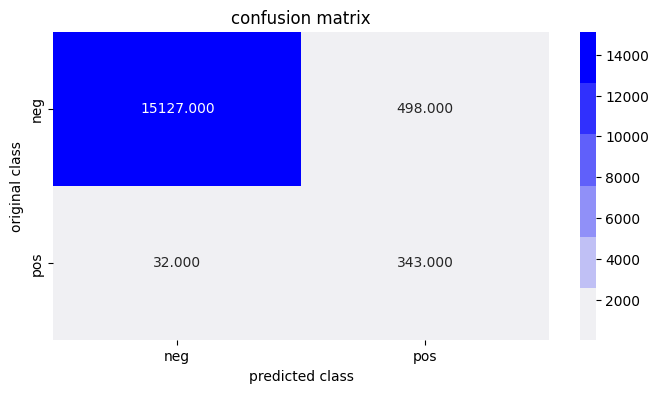

f1_score : 0.5641447368421053
Total Cost due to mis classifiation: 20980


In [63]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_mean, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [64]:
#XGB with mean


In [65]:
parameters = {"max_depth": [5,8,10] , "n_estimators":[300,500,1000,2000]}
#Gridsearch CV with 2 fold crossvalidation
xgb = XGBClassifier()
GCV = GridSearchCV(xgb,param_grid=parameters, scoring = "f1", verbose = 1,cv=2, n_jobs = -1)
GCV.fit(x_train_mean_std , y_train_mean)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'n_estimators': [300, 500, 1000, 2000]},
             scoring='f1', verbose=1)

In [66]:
clf_xgb_mean= GCV.best_estimator_


In [67]:
GCV.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
x_t, x_c, y_t, y_c = train_test_split(x_train_mean_std, y_train_mean, stratify=y_train_mean, test_size=0.3)
clf_xgb_mean.fit(x_t, y_t)
sig_clf_probs = clf_xgb_mean.predict_proba(x_c)[:,1]

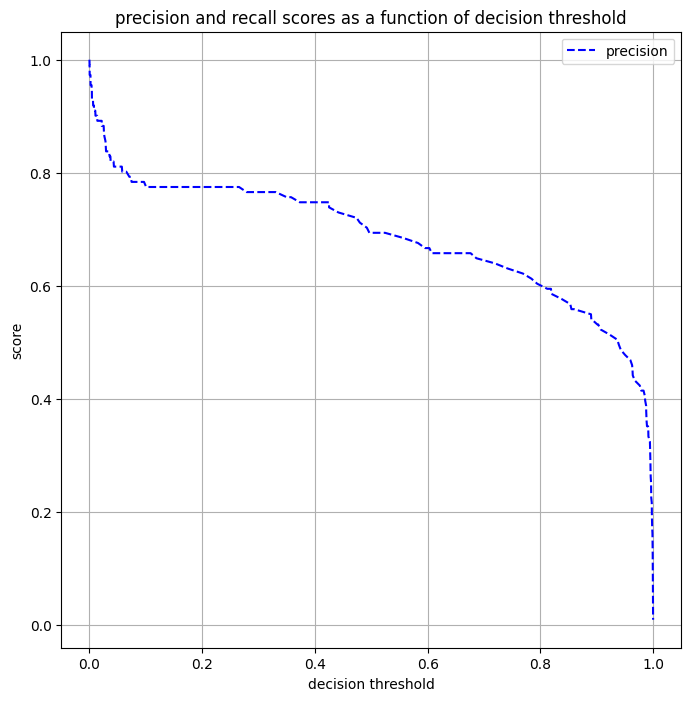

In [69]:

presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

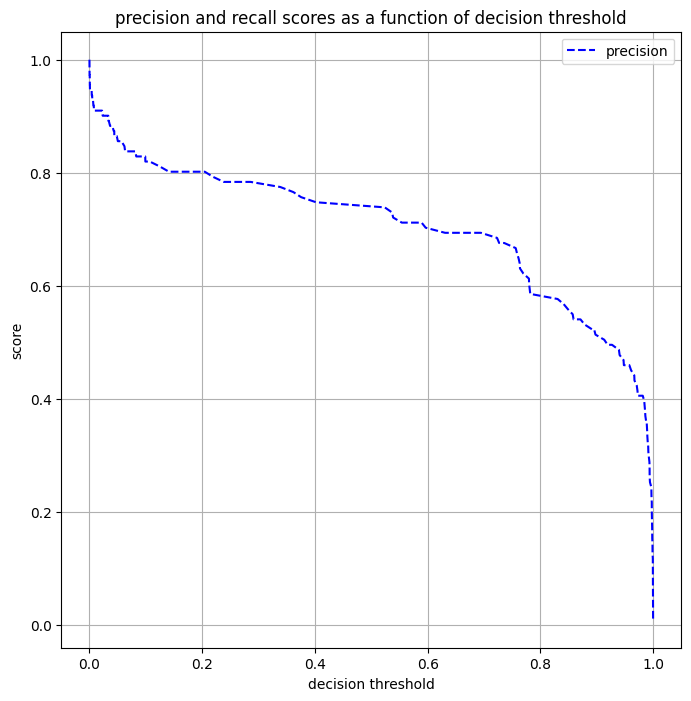

In [70]:
x_t, x_c, y_t, y_c = train_test_split(x_train_mean_std, y_train_mean, stratify=y_train_mean, test_size=0.3)
clf_xgb_mean.fit(x_t, y_t)
sig_clf_probs = clf_xgb_mean.predict_proba(x_c)[:,1]
#train_predict = clf.predict(x_train)
#cross_predict = clf.predict(x_test)
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [71]:
t=0.8
clf= GCV.best_estimator_
clf.fit(x_train_mean_std , y_train_mean)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
test_clf_probs = clf.predict_proba(x_test_mean_std)[:,1]
train_clf_probs = clf.predict_proba(x_train_mean_std)[:,1]

In [73]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


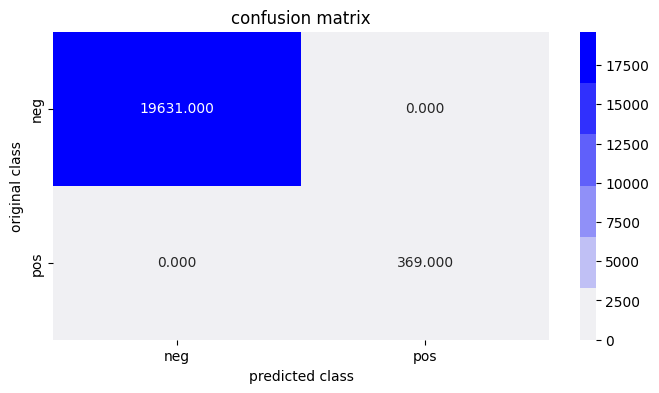

f1_score : 1.0
Total Cost due to mis classifiation: 0
Test Confusion Matrix


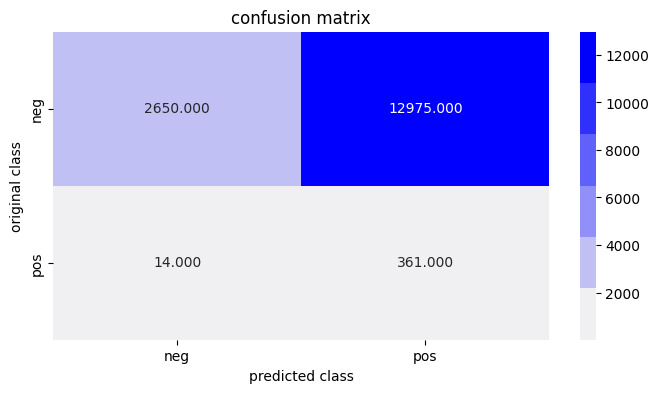

f1_score : 0.05265844942017358
Total Cost due to mis classifiation: 136750


In [74]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_constant[:20000], train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [75]:
#Random Forest with mean
parameters={'max_depth':[3,5,8,10],'n_estimators':[100,300,500,1000,2000]}

In [76]:
RF=RandomForestClassifier()
GCV=GridSearchCV(RF,param_grid=parameters,scoring='f1',verbose=1,cv=2,n_jobs=-1)
GCV.fit(x_train_mean_std,y_train_mean)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'n_estimators': [100, 300, 500, 1000, 2000]},
             scoring='f1', verbose=1)

In [77]:
clf_rf_mean= GCV.best_estimator_


In [78]:
GCV.best_estimator_


RandomForestClassifier(max_depth=10, n_estimators=500)

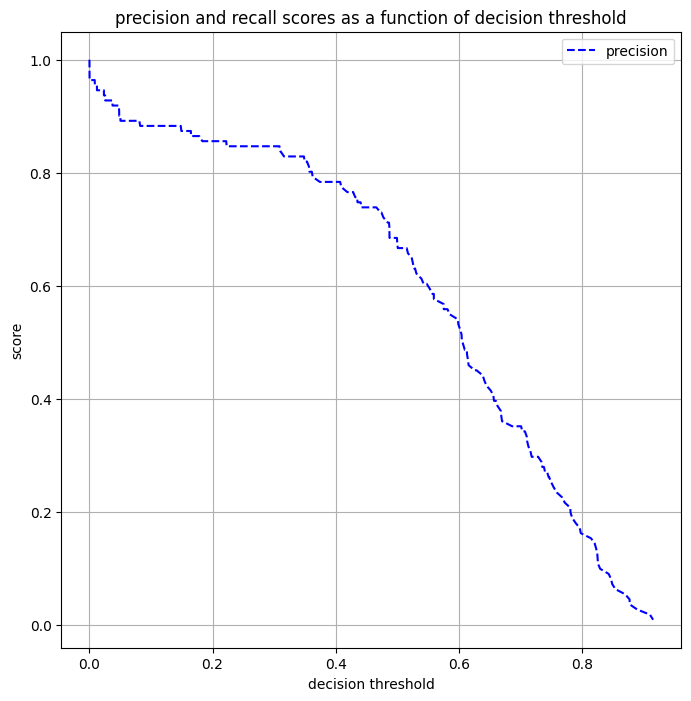

In [79]:
x_t, x_c, y_t, y_c = train_test_split(x_train_mean_std , y_train_mean, stratify=y_train_mean, test_size=0.3)
clf_rf_mean.fit(x_t, y_t)
sig_clf_probs = clf_rf_mean.predict_proba(x_c)[:,1]
#train_predict = clf.predict(x_train)
#cross_predict = clf.predict(x_test)
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [80]:
t=0.6


In [81]:
clf= GCV.best_estimator_
clf.fit(x_train_mean_std , y_train_mean)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [82]:
test_clf_probs = clf.predict_proba(x_test_mean_std)[:,1]
train_clf_probs = clf.predict_proba(x_train_mean_std)[:,1]

In [83]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

In [84]:
y_train_constant=y_train_constant[:20000]

Train Confusion Matrix


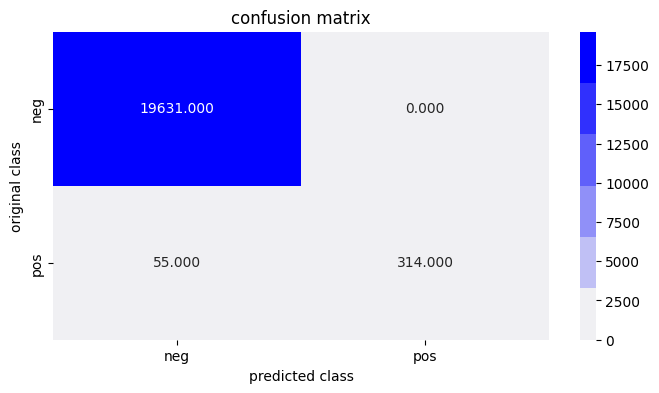

f1_score : 0.9194729136163983
Total Cost due to mis classifiation: 27500
Test Confusion Matrix


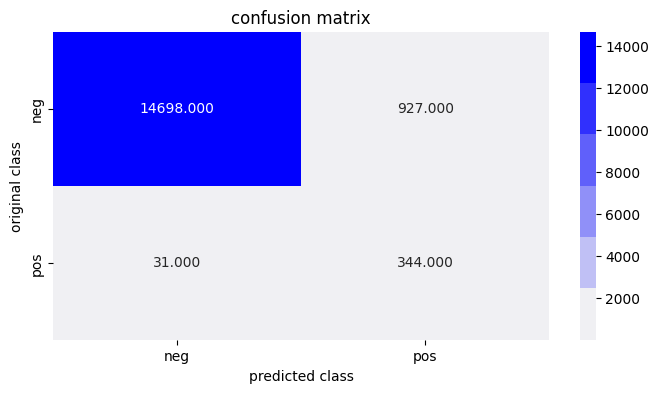

f1_score : 0.41798298906439846
Total Cost due to mis classifiation: 24770


In [85]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_constant, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [86]:
#Linear\logistic Regression with median
parameters = {"alpha": [10 ** x for x in range(-6, 3)], "penalty" : ['l2','l1'], "loss" : ['log','hinge']}

#Gridsearch CV with 8 fold crossvalidation

LR = SGDClassifier()    
GCV = GridSearchCV(LR,param_grid=parameters, scoring = "f1", verbose = 1,cv=8, n_jobs = -1)
GCV.fit(X_train_median_std , y_train_median )

Fitting 8 folds for each of 36 candidates, totalling 288 fits


GridSearchCV(cv=8, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100],
                         'loss': ['log', 'hinge'], 'penalty': ['l2', 'l1']},
             scoring='f1', verbose=1)

In [87]:
GCV.best_estimator_


SGDClassifier()

In [88]:
clf_sgd_median= GCV.best_estimator_


In [89]:
X_train_median_std=X_train_constant_std[:]

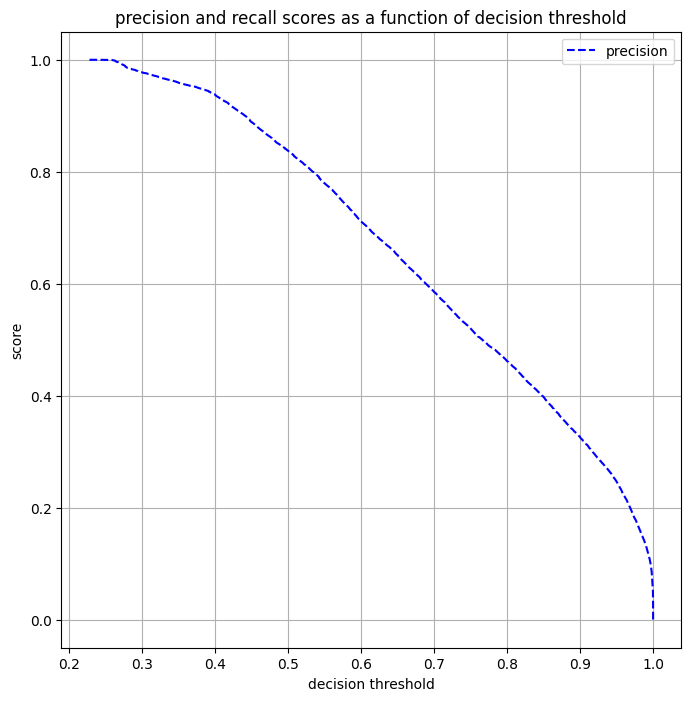

In [90]:
x_t, x_c, y_t, y_c = train_test_split(X_train_median_std , y_train_median, stratify=y_train_median, test_size=0.3)
clf_sgd_median.fit(x_t, y_t)
sig_clf = CalibratedClassifierCV(clf_sgd_median, method="sigmoid")
sig_clf.fit(x_t, y_t)
sig_clf_probs = sig_clf.predict_proba(x_c)[:,1]
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [91]:
t=0.32


In [92]:
clf= GCV.best_estimator_
clf.fit(X_train_median_std , y_train_median)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_median_std , y_train_median)
test_clf_probs = sig_clf.predict_proba(x_test_median_std)[:,1]
train_clf_probs = sig_clf.predict_proba(X_train_median_std)[:,1]

In [93]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


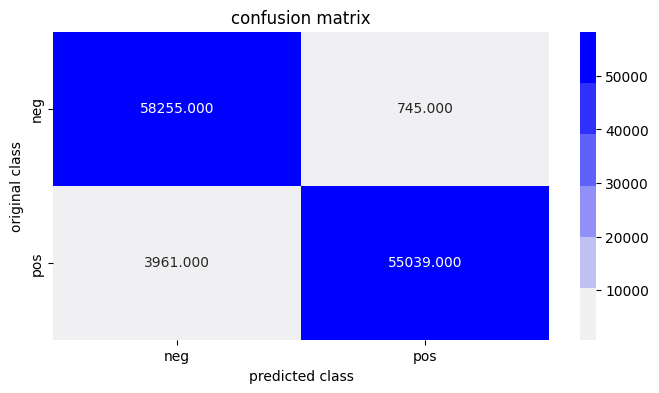

f1_score : 0.9590012545302481
Total Cost due to mis classifiation: 1987950
Test Confusion Matrix


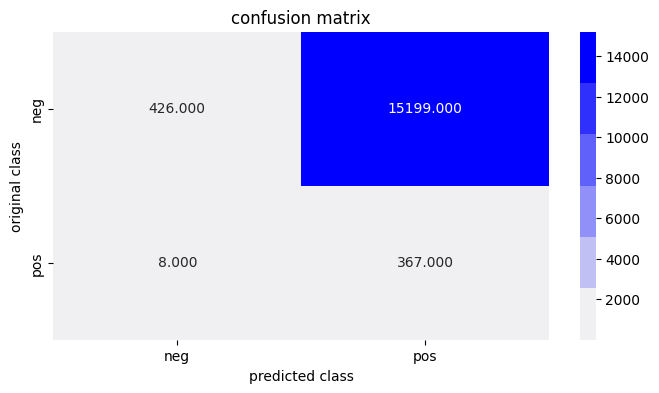

f1_score : 0.04604479016372875
Total Cost due to mis classifiation: 155990


In [94]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_median, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [95]:
#XGB with median

parameters = {"max_depth": [5,8,10] , "n_estimators":[300,500,1000,2000]}


#Gridsearch CV with 2 fold crossvalidation

xgb = XGBClassifier()
GCV = GridSearchCV(xgb,param_grid=parameters, scoring = "f1", verbose = 1,cv=2,n_jobs = -1)
GCV.fit(X_train_median_std , y_train_median)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'n_estimators': [300, 500, 1000, 2000]},
             scoring='f1', verbose=1)

In [96]:
clf_xgb_median= GCV.best_estimator_


In [97]:
GCV.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

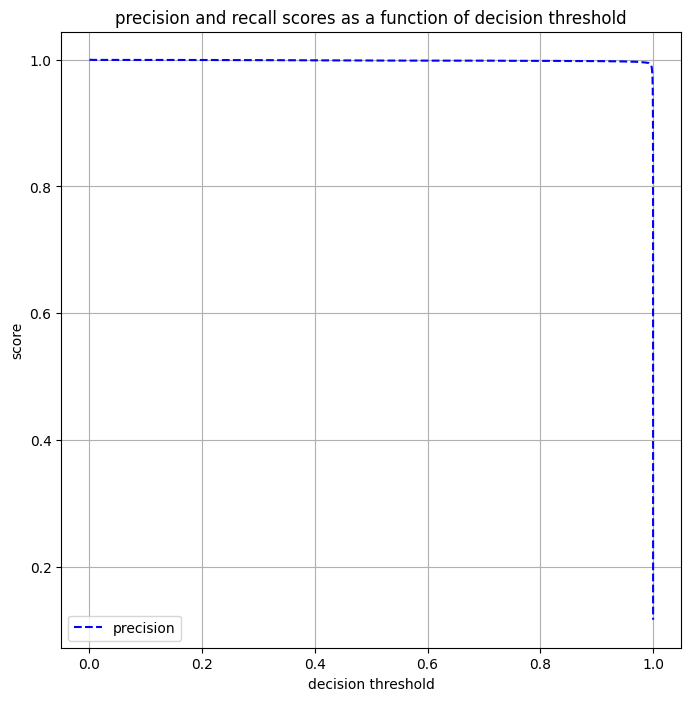

In [98]:
x_t, x_c, y_t, y_c = train_test_split(X_train_median_std, y_train_median, stratify=y_train_median, test_size=0.3)
clf_xgb_median.fit(x_t, y_t)
sig_clf_probs = clf_xgb_median.predict_proba(x_c)[:,1]
#train_predict = clf.predict(x_train)
#cross_predict = clf.predict(x_test)
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [99]:
t=0.8
clf_xgb_median.fit(X_train_median_std , y_train_median)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [180]:
test_clf_probs = clf_xgb_median.predict_proba(x_test_mean_std)[:,1]
train_clf_probs = clf_xgb_median.predict_proba(x_train_mean_std)[:,1]

In [101]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


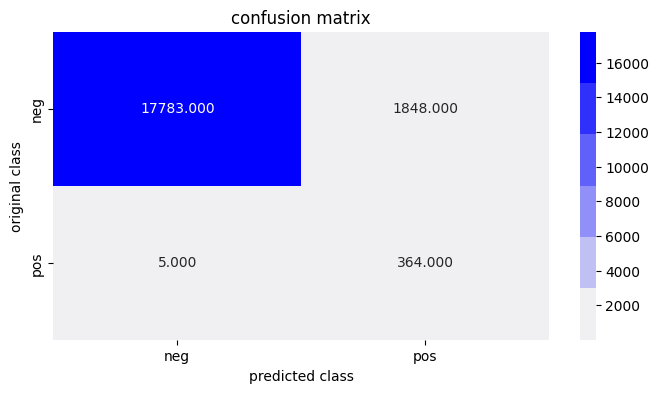

f1_score : 0.2820612165827199
Total Cost due to mis classifiation: 20980
Test Confusion Matrix


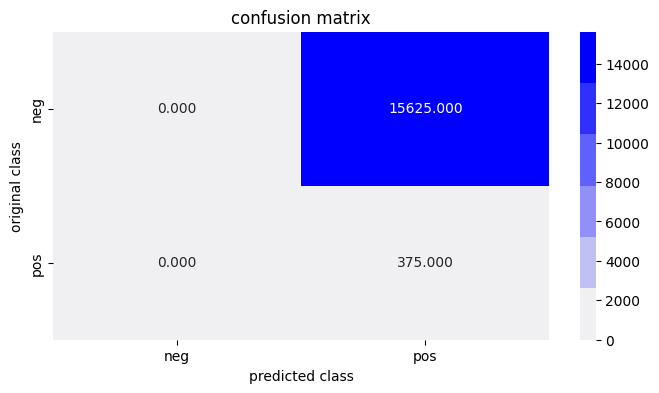

f1_score : 0.04580152671755725
Total Cost due to mis classifiation: 156250


In [102]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_median[:20000], train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [103]:
#Linear\logistic Regression with constant value imputation
parameters = {"alpha": [10 ** x for x in range(-6, 3)], "penalty" : ['l2','l1'], "loss" : ['log','hinge']}

#Gridsearch CV with 8 fold crossvalidation

LR = SGDClassifier()    
GCV = GridSearchCV(LR,param_grid=parameters, scoring = "f1", verbose = 1,cv=8, n_jobs = -1)
GCV.fit(X_train_constant_std[:20000] , y_train_constant )


Fitting 8 folds for each of 36 candidates, totalling 288 fits


GridSearchCV(cv=8, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100],
                         'loss': ['log', 'hinge'], 'penalty': ['l2', 'l1']},
             scoring='f1', verbose=1)

In [108]:
clf_sgd_constant= GCV.best_estimator_


In [111]:
GCV.best_estimator_


SGDClassifier()

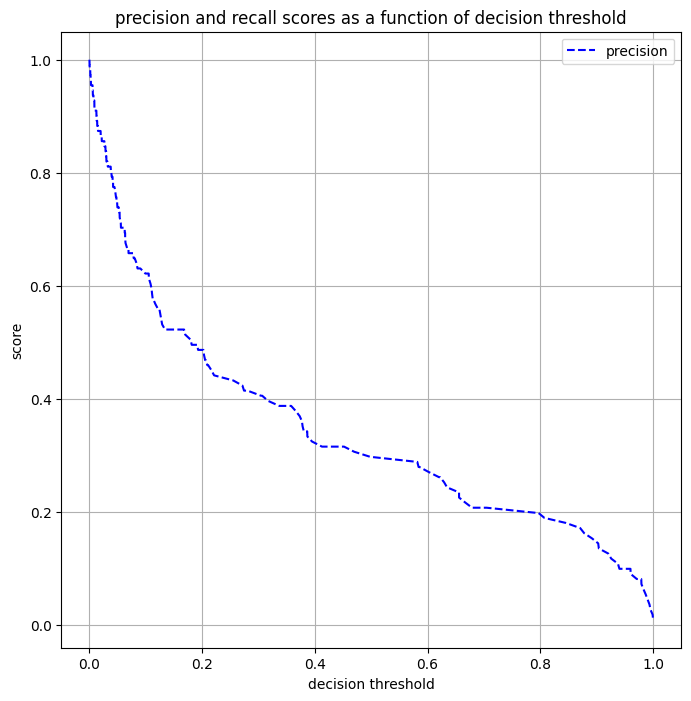

In [113]:
x_t, x_c, y_t, y_c = train_test_split(X_train_constant_std[:20000] , y_train_constant, stratify=y_train_constant, test_size=0.3)
clf_sgd_constant.fit(x_t, y_t)
sig_clf = CalibratedClassifierCV(clf_sgd_constant, method="sigmoid")
sig_clf.fit(x_t, y_t)
sig_clf_probs = sig_clf.predict_proba(x_c)[:,1]
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)

In [114]:
t=0.3


In [122]:
X_train_constant_std=X_train_constant_std[:20000]

In [123]:
clf= GCV.best_estimator_
clf.fit(X_train_constant_std[:20000] , y_train_constant)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_constant_std , y_train_constant)
test_clf_probs = sig_clf.predict_proba(X_test_constant_std)[:,1]
train_clf_probs = sig_clf.predict_proba(X_train_constant_std)[:,1]

In [125]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


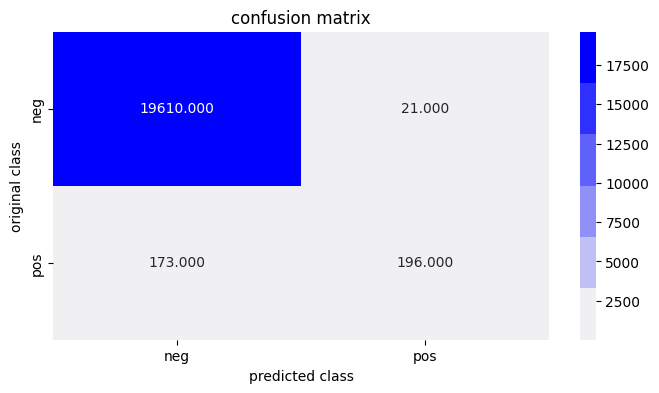

f1_score : 0.6689419795221844
Total Cost due to mis classifiation: 86710
Test Confusion Matrix


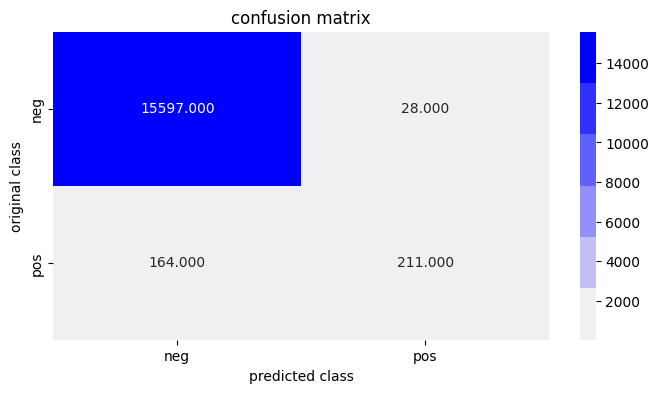

f1_score : 0.6872964169381107
Total Cost due to mis classifiation: 82280


In [164]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_constant, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

In [127]:
#XGB with constant value imputation


In [165]:
parameters = {"max_depth": [5,8,10] , "n_estimators":[300,500,1000,2000]}


#Gridsearch CV with 2 fold crossvalidation

xgb = XGBClassifier()
GCV = GridSearchCV(xgb,param_grid=parameters, scoring = "f1", verbose = 1,cv=2,n_jobs = -1)
GCV.fit(X_train_constant_std[:20000] , y_train_constant)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'n_estimators': [300, 500, 1000, 2000]},
             scoring='f1', verbose=1)

In [166]:
clf_xgb_constant= GCV.best_estimator_


In [167]:
GCV.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [168]:
clf_xgb_constant = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [169]:
import numpy as np
has_nan = np.isnan(y_t).any()
print("Contains NaN values:", has_nan)


Contains NaN values: False


In [170]:
t=0.8


In [181]:
#Random Forest with constant value imputation
parameters = {"max_depth": [3,5,8,10] , "n_estimators":[100,300,500,1000,2000]}


#Gridsearch CV with 2 fold crossvalidation

RF = RandomForestClassifier()
GCV = GridSearchCV(RF,param_grid=parameters, scoring = "f1", verbose = 1,cv=2,n_jobs =-1)
GCV.fit(X_train_constant_std , y_train_constant)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'n_estimators': [100, 300, 500, 1000, 2000]},
             scoring='f1', verbose=1)

In [182]:
clf_rf_constant= GCV.best_estimator_


In [183]:
GCV.best_estimator_


RandomForestClassifier(max_depth=10, n_estimators=2000)

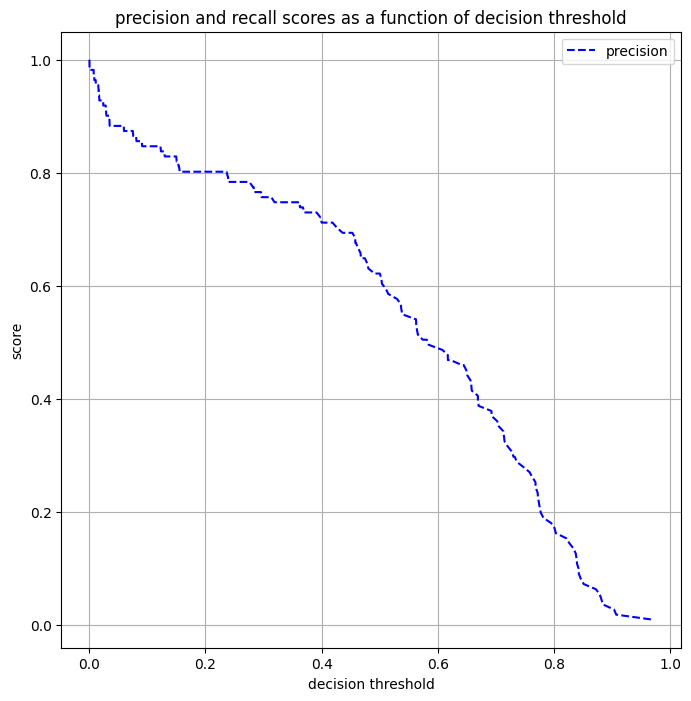

In [184]:
x_t, x_c, y_t, y_c = train_test_split(X_train_constant_std , y_train_constant, stratify=y_train_constant, test_size=0.3)
clf_rf_constant.fit(x_t, y_t)
sig_clf_probs = clf_rf_constant.predict_proba(x_c)[:,1]
#train_predict = clf.predict(x_train)
#cross_predict = clf.predict(x_test)
presicision, recall, tresholds =precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(presicision, recall, tresholds)